<a href="https://colab.research.google.com/github/hagijakobson/daily-web-page-views-forecast/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily web page views forecast with Facebook Prophet

## Step 1. Facebook Prophet installation

- Visualizações diárias de uma página web da Wikipedia: https://en.wikipedia.org/wiki/Peyton_Manning

In [1]:
!pip install fbprophet

## Step 2. Import libraries

In [2]:
from fbprophet import Prophet
import pandas as pd

## Step 3. Load dataset

In [4]:
dataset = pd.read_csv('page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Step 4. Time series exploration

In [5]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


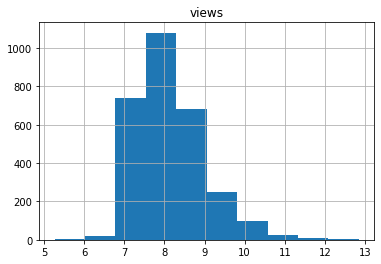

In [6]:
dataset.hist();

In [7]:
dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'})
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [8]:
dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Step 5. Time series forecast with Facebook Prophet

In [9]:
model = Prophet()
model.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [11]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.038509,8.244307,9.468051,8.038509,8.038509,0.803012,0.803012,0.803012,0.352283,0.352283,0.352283,0.450729,0.450729,0.450729,0.0,0.0,0.0,8.841521
1,2007-12-11,8.036976,7.969250,9.194793,8.036976,8.036976,0.553114,0.553114,0.553114,0.119631,0.119631,0.119631,0.433483,0.433483,0.433483,0.0,0.0,0.0,8.590090
2,2007-12-12,8.035443,7.778863,9.005669,8.035443,8.035443,0.350515,0.350515,0.350515,-0.066656,-0.066656,-0.066656,0.417171,0.417171,0.417171,0.0,0.0,0.0,8.385958
3,2007-12-13,8.033910,7.738782,8.983010,8.033910,8.033910,0.329968,0.329968,0.329968,-0.072272,-0.072272,-0.072272,0.402239,0.402239,0.402239,0.0,0.0,0.0,8.363878
4,2007-12-14,8.032377,7.751763,8.945494,8.032377,8.032377,0.319515,0.319515,0.319515,-0.069577,-0.069577,-0.069577,0.389092,0.389092,0.389092,0.0,0.0,0.0,8.351892


In [12]:
len(dataset), len(forecast)

(2905, 2995)

In [13]:
len(forecast) - len(dataset)

90

In [14]:
forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.561398,7.924152,9.199728,7.561398,7.561398,0.999876,0.999876,0.999876,-0.072272,-0.072272,-0.072272,1.072148,1.072148,1.072148,0.0,0.0,0.0,8.561274
2906,2016-01-22,7.560382,7.961565,9.202596,7.560382,7.560382,1.016899,1.016899,1.016899,-0.069577,-0.069577,-0.069577,1.086476,1.086476,1.086476,0.0,0.0,0.0,8.577281
2907,2016-01-23,7.559367,7.725255,8.945607,7.559367,7.559367,0.786633,0.786633,0.786633,-0.311714,-0.311714,-0.311714,1.098347,1.098347,1.098347,0.0,0.0,0.0,8.345999
2908,2016-01-24,7.558351,8.035853,9.369202,7.558351,7.558351,1.155671,1.155671,1.155671,0.048306,0.048306,0.048306,1.107365,1.107365,1.107365,0.0,0.0,0.0,8.714022
2909,2016-01-25,7.557335,8.406650,9.661532,7.557335,7.557335,1.465402,1.465402,1.465402,0.352283,0.352283,0.352283,1.113119,1.113119,1.113119,0.0,0.0,0.0,9.022737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.475050,6.252922,7.534224,7.452381,7.502084,-0.560920,-0.560920,-0.560920,-0.069577,-0.069577,-0.069577,-0.491343,-0.491343,-0.491343,0.0,0.0,0.0,6.914130
2991,2016-04-16,7.474034,6.096882,7.352379,7.450959,7.501694,-0.772962,-0.772962,-0.772962,-0.311714,-0.311714,-0.311714,-0.461248,-0.461248,-0.461248,0.0,0.0,0.0,6.701071
2992,2016-04-17,7.473018,6.439629,7.689187,7.448907,7.501790,-0.383246,-0.383246,-0.383246,0.048306,0.048306,0.048306,-0.431552,-0.431552,-0.431552,0.0,0.0,0.0,7.089771
2993,2016-04-18,7.472002,6.775148,8.013068,7.445916,7.501268,-0.050713,-0.050713,-0.050713,0.352283,0.352283,0.352283,-0.402996,-0.402996,-0.402996,0.0,0.0,0.0,7.421289


## Step 6. Plots

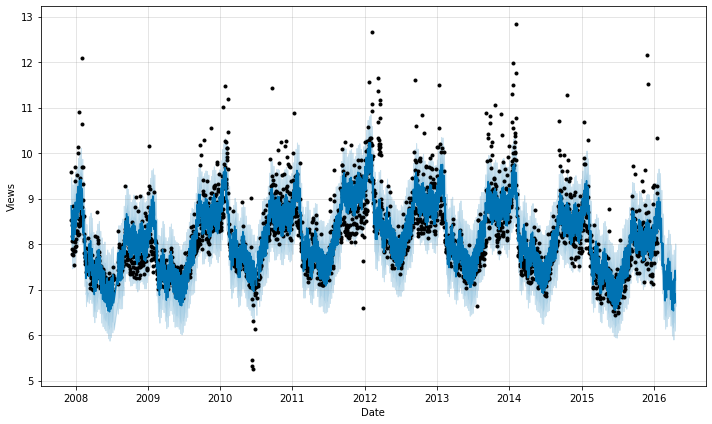

In [15]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Views');

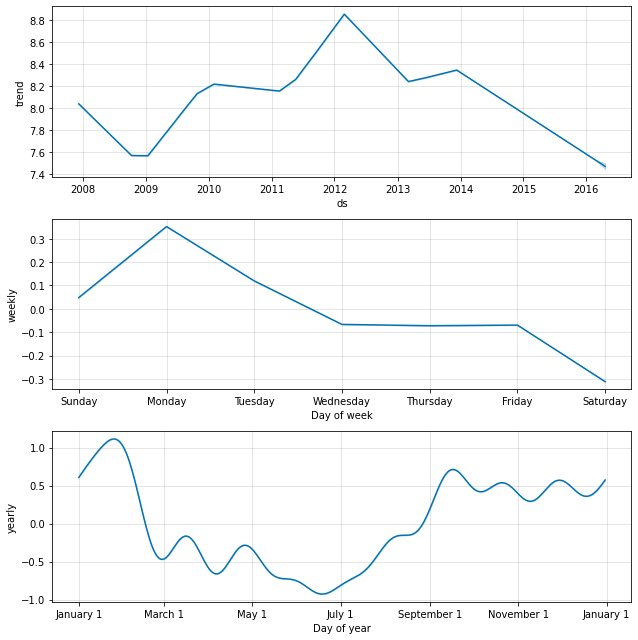

In [16]:
model.plot_components(forecast);

In [17]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [18]:
plot_plotly(model, forecast)

In [19]:
plot_components_plotly(model, forecast)